          0         1         2         3         4         5         6  \
0 -0.608337  0.235964  0.102885 -0.084149 -0.530774 -0.277092  0.076720   
1  0.298299 -0.554144 -0.323865 -0.146971  0.224637  0.460799 -0.298838   
2 -0.144877 -0.066578 -0.202482  0.087280 -0.641050 -0.107904 -0.394343   
3  0.039597  0.193640  0.214064 -0.156421  0.153516 -0.213105  0.256064   
4  0.266341  0.035732  0.172230 -0.355546 -0.470787 -0.112605  0.088773   

          7         8         9    result  
0 -0.039151  0.329686 -0.230067  0.100948  
1 -0.108281  0.296942  0.123309  0.100948  
2  0.042275  0.009802 -0.367221  0.100948  
3  0.095153  0.003670  0.289888  0.100948  
4 -0.082858  0.397525 -0.271874  0.100948  


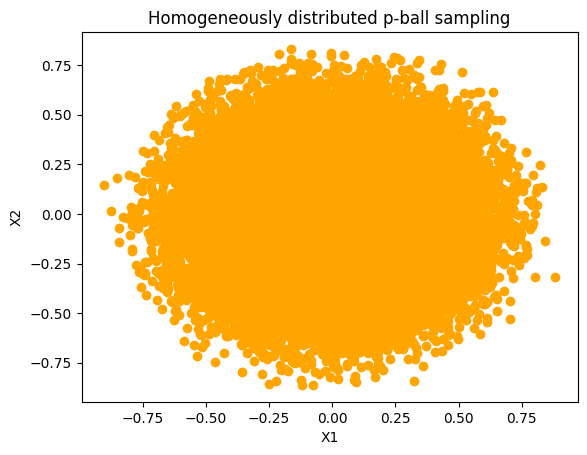

In [47]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import math
import tensorflow as tf
import random as rand
import pandas as pd
import numpy as np
import sklearn
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

N = 2000
p = 10

def f(x):
    sum = 0
    for h in range(p):
        sum += pow(x[h], p)
    inside = pow(sum, 1/p)
    result = math.exp((-10)*pow(inside, 2))
    return result

# Generate "num_points" random points in "dimension" that have uniform
# probability over the unit ball scaled by "radius" (length of points
# are in range [0, "radius"]).
def random_ball(num_points, dimension, radius=1):
    from numpy import random, linalg
    # First generate random directions by normalizing the length of a
    # vector of random-normal values (these distribute evenly on ball).
    random_directions = random.normal(size=(dimension,num_points))
    random_directions /= linalg.norm(random_directions, axis=0)
    # Second generate a random radius with probability proportional to
    # the surface area of a ball with a given radius.
    random_radii = random.random(num_points) ** (1/dimension)
    # Return the list of random (direction & length) points.
    return radius * (random_directions * random_radii).T


def plot(X_train):
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title("Homogeneously distributed p-ball sampling")
    plt.scatter(X_train.loc[:, 0], X_train.loc[:, 1], color = 'orange')
    plt.show()


X_radius = pd.DataFrame(random_ball(N, p))
for i in range(N): X_radius['result'] = f(X_radius.loc[i, :9])

print(X_radius.head())    
plot(X_radius)

With a Nearest Neighbor. k = 1.

In [48]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
  
  
# Create feature and target arrays
X = X_radius.loc[:, :9]
#y = X_radius.loc[:, 10]
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
knn = KNeighborsClassifier(n_neighbors=1)
  
knn.fit(X_train, y_train)
  
# Predict on dataset which model has not seen before
print(knn.predict(X_test))
#knn.score(X_train, y_train)


KeyError: 10

sdf

With a Neural Network

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 10)                120       
                                                                 
 dense_9 (Dense)             (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20


c:\Users\ferro\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
c:\Users\ferro\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


200/200 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 2/20
200/200 [==============================] - 0s 1ms/step - loss: 6.5076e-05
Epoch 3/20
200/200 [==============================] - 0s 1ms/step - loss: 2.5939e-05
Epoch 4/20
200/200 [==============================] - 0s 1ms/step - loss: 1.3845e-05
Epoch 5/20
200/200 [==============================] - 0s 1ms/step - loss: 1.3845e-05
Epoch 6/20
200/200 [==============================] - 0s 1ms/step - loss: 1.3845e-05
Epoch 7/20
200/200 [==============================] - 0s 1ms/step - loss: 1.3845e-05
Epoch 8/20
200/200 [==============================] - 0s 1ms/step - loss: 1.3845e-05
Epoch 9/20
200/200 [==============================] - 0s 1ms/step - loss: 1.3845e-05
Epoch 10/20
200/200 [==============================] - 0s 1ms/step - loss: 1.3845e-05
Epoch 11/20
200/200 [==============================] - 0s 1ms/step - loss: 1.3845e-05
Epoch 12/20
200/200 [==============================] - 0s 1ms/step - loss: 1.3

<AxesSubplot:>

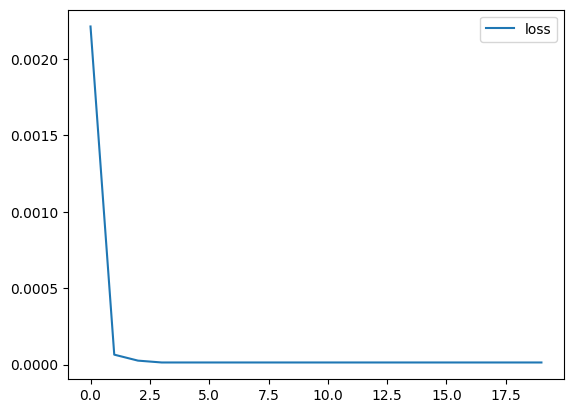

In [ ]:

# 75% of the data is selected
#train_df = train_df.sample(frac=0.75, random_state=4)

scaler = StandardScaler()
scaler.fit(X_train) 
X_train = scaler.transform(X_train) 

X_train = pd.DataFrame(X_train)
df = pd.DataFrame(df)

#X_test = scaler.transform(x_test) 

# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]

input_shape


model = tf.keras.Sequential([
	tf.keras.layers.Dense(units=10, activation='relu',
						input_shape=input_shape),
    tf.keras.layers.Dense(units=1, activation='relu')
])

model.summary()

# adam optimizer works pretty well for
# all kinds of problems and is a good starting point
model.compile(optimizer='adam',
			
			# MAE error is good for
			# numerical predictions
			loss='mae')

losses = model.fit(X_train, y_train,
					
				# it will use 'batch_size' number
				# of examples per example
				batch_size=10,
				epochs=20, # total epoch

				)
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_train.iloc[0:3, :])


loss_df = pd.DataFrame(losses.history)

# history stores the loss/val
# loss in each epoch

# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss']].plot()